In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train.csv',index_col=0)
test = pd.read_csv(filepath_home+'test_x.csv',index_col=0)

In [3]:
# 분할 지점 저장해두고 데이터 통합 후 전처리
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [4]:
question_cols = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [5]:
question_data = data[question_cols].copy()

In [6]:
corr = question_data.corr(method='spearman')

In [7]:
low = corr.min().min()
high = corr.max().max()

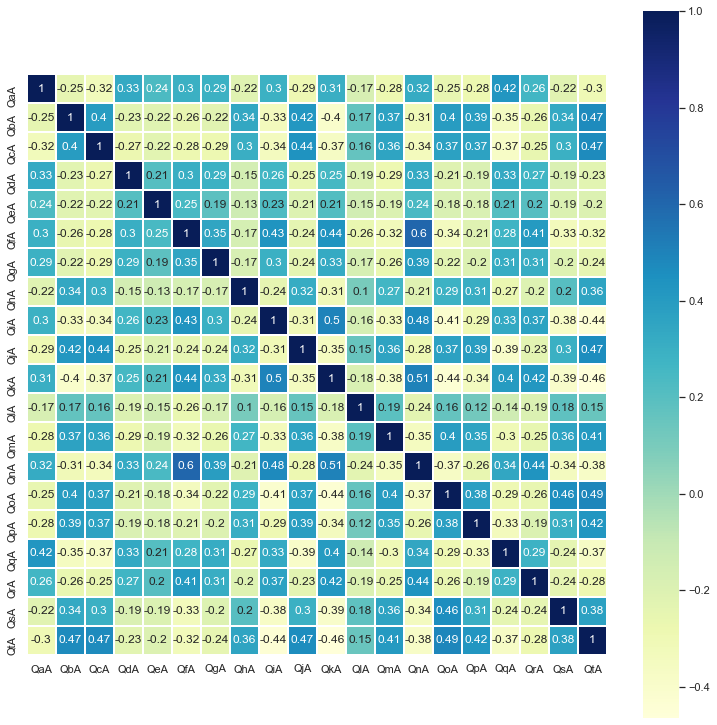

In [8]:
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=low,
            vmax=high,
            cmap='YlGnBu',
           annot=True,
           linewidths=1)

In [9]:
already_know_negative = ["QeA", "QfA", "QkA", "QqA", "QrA"]
question_data[already_know_negative]=6-question_data[already_know_negative]

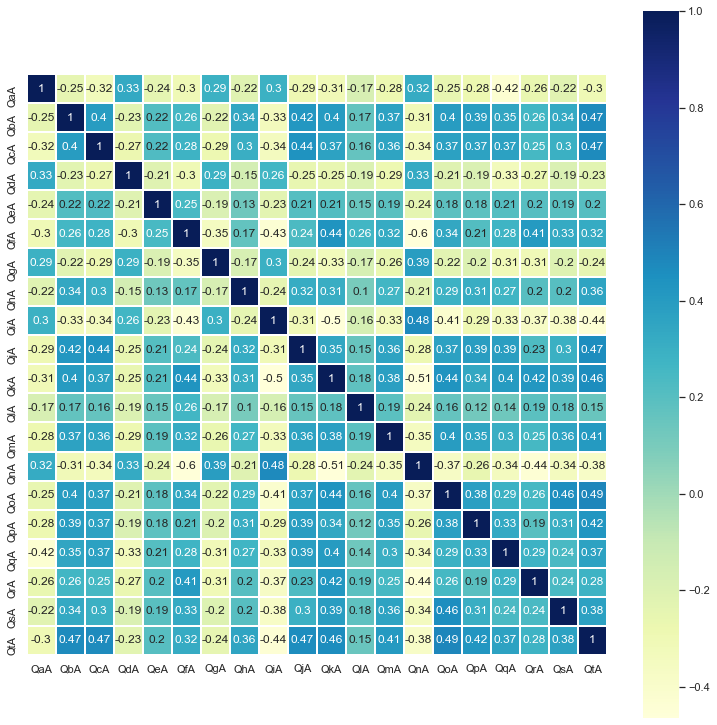

In [10]:
corr = question_data.corr(method='spearman')
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=low,
            vmax=high,
            cmap='YlGnBu',
           annot=True,
           linewidths=1)

In [11]:
from_heatmap_negative = ["QaA", "QdA", "QgA", "QiA", "QnA"]
question_data[from_heatmap_negative]=6-question_data[from_heatmap_negative]

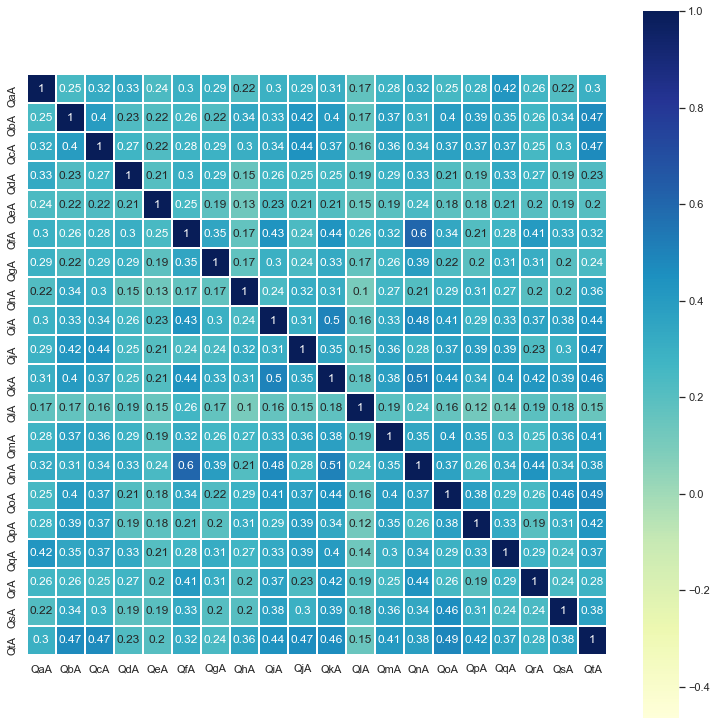

In [12]:
corr = question_data.corr(method='spearman')
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=low,
            vmax=high,
            cmap='YlGnBu',
           annot=True,
           linewidths=1)

In [14]:
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]

# Summary

__1~5 의 의미가 뒤집혀야하는 질문들,__

A,D,E,F,G,I,K,N,Q,R

In [15]:
data['mach_score'] = question_data.mean(axis=1)

In [16]:
data[total_negative_cols] = 6-data[total_negative_cols]

In [17]:
data.corr(method='spearman')['mach_score'].abs().sort_values(ascending=False)

mach_score    1.000000
QkA           0.703580
QtA           0.687195
QnA           0.671003
QiA           0.652618
                ...   
wr_10         0.012567
QhE           0.011545
wr_12         0.003073
tp05          0.000680
wr_02         0.000371
Name: mach_score, Length: 73, dtype: float64

In [18]:
data.drop(question_cols,axis=1).corr(method='spearman')['mach_score'].abs().sort_values(ascending=False)

mach_score    1.000000
tp07          0.447801
tp02          0.333774
QcE           0.245148
QdE           0.238919
QsE           0.221860
married       0.206293
QaE           0.203715
QfE           0.200508
QlE           0.194228
QtE           0.188395
QeE           0.185008
QoE           0.181287
QmE           0.179635
QjE           0.173030
QbE           0.160377
QgE           0.158011
QrE           0.152581
QnE           0.132525
familysize    0.111833
education     0.108866
QkE           0.107586
QpE           0.102806
tp08          0.100623
tp01          0.099797
wf_02         0.099709
QqE           0.098714
wr_01         0.097642
wf_01         0.087517
tp03          0.074875
engnat        0.073255
wf_03         0.066056
wr_06         0.060343
wr_04         0.053945
tp06          0.051146
tp04          0.048923
hand          0.046457
wr_09         0.042356
QiE           0.041467
urban         0.031673
wr_07         0.031289
tp10          0.027860
wr_05         0.026604
wr_11      

In [19]:
train['mach_score']=data.iloc[:split_point]['mach_score']

In [20]:
train[['mach_score','voted']].corr(method='spearman')

,mach_score,voted
mach_score,1.000000,0.100903
voted,0.100903,1.000000


In [22]:
train.groupby(['voted'])['mach_score'].mean()

voted
1    3.263279
2    3.426394
Name: mach_score, dtype: float64

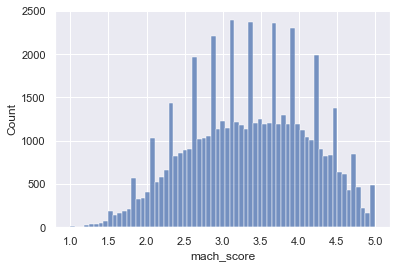

In [23]:
sns.histplot(data=data,x='mach_score')

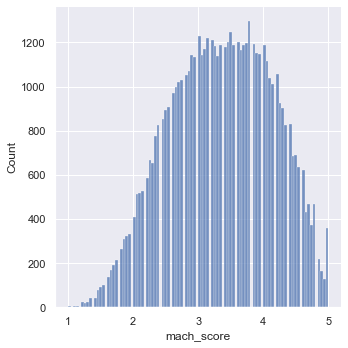

In [24]:
sns.displot(data, x="mach_score", bins=100)

In [25]:
train['mach_int'] = np.round(train['mach_score'])

In [29]:
train[['mach_int','voted']].corr('spearman')

,mach_int,voted
mach_int,1.000000,0.097289
voted,0.097289,1.000000


In [33]:
train.corr(method='spearman')['voted'].abs().sort_values(ascending=False)[]

voted        1.000000
education    0.329352
married      0.240659
QqA          0.123366
wr_11        0.116734
               ...   
QkE          0.018597
QeA          0.013605
hand         0.005225
QdA          0.002775
wf_01        0.000539
Name: voted, Length: 75, dtype: float64

In [35]:
train.corr(method='spearman')['voted'][train.corr(method='spearman')['voted'].abs()>0.1]

QbA           0.100406
QqA          -0.123366
education    -0.329352
married      -0.240659
voted         1.000000
wr_01        -0.107857
wr_06        -0.102477
wr_11        -0.116734
mach_score    0.100903
Name: voted, dtype: float64

In [37]:
train.groupby(['education','married'])['voted'].mean().unstack()

married,0,1,2,3
education,,,,
0,2.000000,1.618893,1.383234,1.396226
1,2.000000,1.966729,1.613636,1.605769
2,1.750000,1.690931,1.386401,1.496810
3,1.500000,1.441220,1.321642,1.391333
4,1.529412,1.458655,1.294267,1.352557
